In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

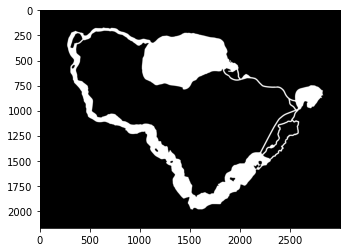

In [2]:
img = cv2.imread("./map_sw_trim.png")
plt.imshow(img);

In [3]:
img.shape

(2170, 3000, 3)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2170, 3000)

In [5]:
print(max(gray.flatten()))
print(min(gray.flatten()))

255
0


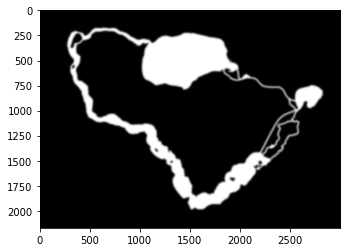

In [8]:
#plt.figure(figsize = (10,10))
imb = cv2.GaussianBlur(gray,(51, 51), 0)
plt.imshow(imb, cmap="gray");


In [10]:
sobelx = cv2.Sobel(imb,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(imb,cv2.CV_64F,0,1,ksize=5)  # y

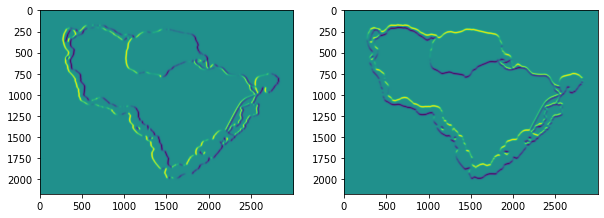

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(sobelx)
axs[1].imshow(sobely);

In [12]:
x_max_value = max(sobelx.flatten())
x_min_value = min(sobelx.flatten())
y_max_value = max(sobely.flatten())
y_min_value = min(sobely.flatten())

print(x_max_value, y_max_value, x_min_value, y_min_value)

1600.0 1600.0 -1600.0 -1600.0


In [13]:
max_value = max(sobelx.flatten())
min_value = min(sobelx.flatten())

sobelx = ((sobelx + abs(x_min_value)) * 255 // (x_max_value*2)).astype(np.uint8)
sobely = ((sobely + abs(y_min_value)) * 255 // (y_max_value*2)).astype(np.uint8)

In [14]:
sobely.shape

(2170, 3000)

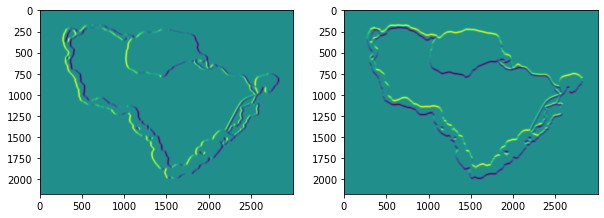

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(sobelx)
axs[1].imshow(sobely);

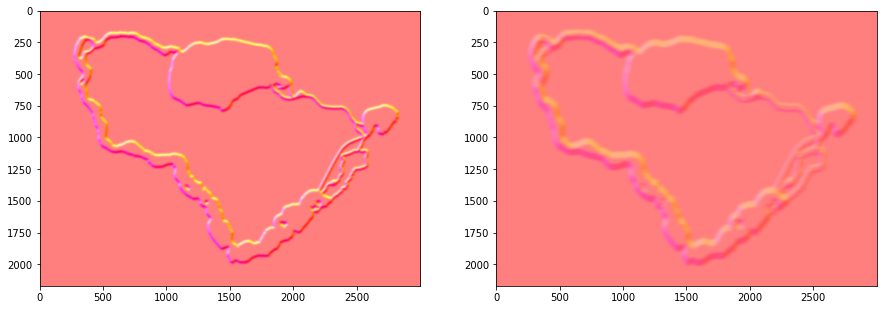

In [16]:
#normalmap = np.array((sobelx, sobely, np.zeros_like(sobelx))).reshape((1000, 1500, 3))

# combine channels to rgb picture
normalmap = np.dstack((np.zeros_like(sobelx)+255, sobely, sobelx))


# convert normalmap to int8
normalmap_blur = cv2.blur(normalmap, (50, 50))

fig, axs = plt.subplots(1,2, figsize=(15, 10))
axs[0].imshow(normalmap);
axs[1].imshow(normalmap_blur);



In [17]:
cv2.imwrite("normalmap.png", normalmap)
cv2.imwrite("normalmap_blur.png", normalmap_blur)

True

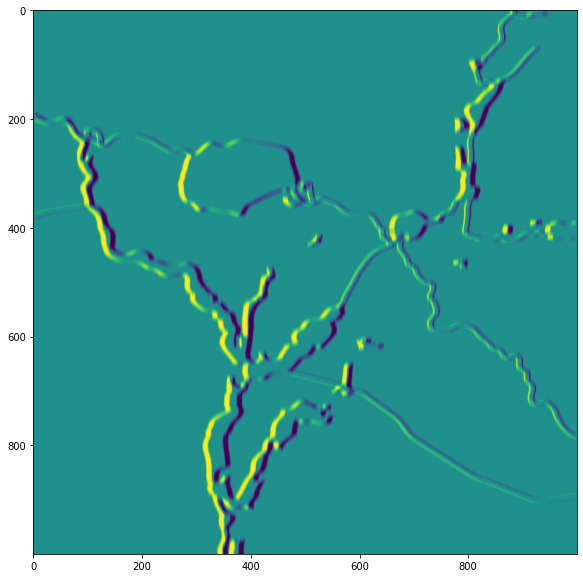

In [ ]:
plt.figure(figsize = (10,10)) 
plt.imshow(sobelx)

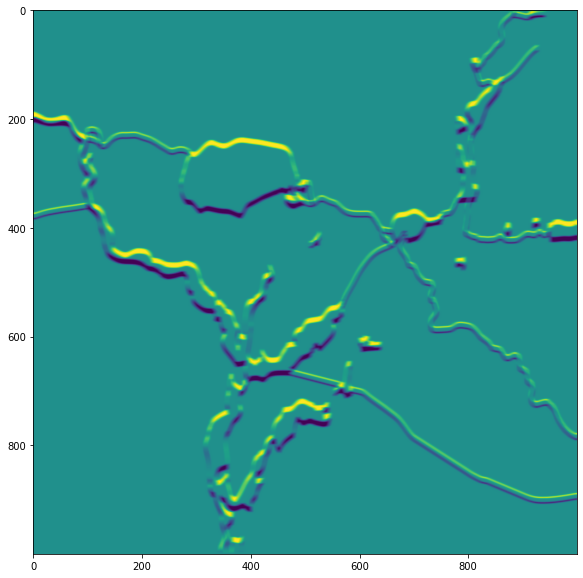

In [ ]:
plt.figure(figsize = (10,10))
ax = plt.imshow(sobely)

In [ ]:
x = sobelx/255 +0.5
y = sobely/255 +0.5



In [ ]:
cv2.imwrite("xdirection.png", x*255)
cv2.imwrite("ydirection.png", y*255)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


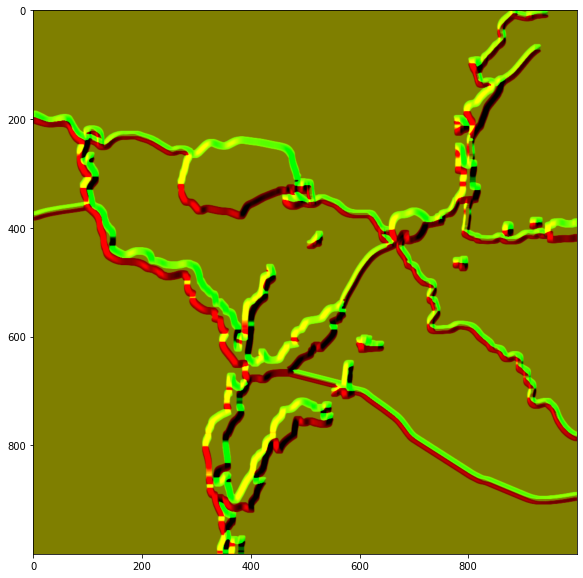

In [ ]:
plt.figure(figsize = (10,10))

merged = cv2.merge([red, green, np.zeros((1000, 1000))])
plt.imshow(merged)